# 📌 Problem Statement
A real company, Zara, wants to know how the customer satisfaction score varies across three different marketing campaigns over time. The company wants to analyze whether there are significant changes in customer satisfaction over 3 months of different campaigns (Campaign A, B, and C).

# 🧠 5W1H
What: Customer satisfaction scores

Why: To evaluate the effectiveness of three different marketing campaigns

When: Data from the last 3 months (January to March)

Where: Nationwide (across all Zara stores in the country)

Who: 200 customers who experienced all 3 campaigns

How: Repeated Measures ANOVA to evaluate if there's a significant difference in satisfaction scores across the three campaigns

# Dataset (Simulated with Multiple Columns)
We will generate a Repeated Measures dataset where the same 200 customers are surveyed across three different time periods (January, February, March) for their satisfaction with three different campaigns.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(2025)

# Define number of customers
n_customers = 200

# Create a full factorial design (each customer has one observation per campaign and month combination)
df = pd.DataFrame({
    'Customer_ID': np.repeat(range(1, n_customers + 1), 3 * 3),  # Repeat customer ID for each combination
    'Month': np.tile(np.repeat(['January', 'February', 'March'], 3), n_customers),  # Tile months
    'Campaign': np.tile(['Campaign A', 'Campaign B', 'Campaign C'], n_customers * 3),  # Tile campaigns
})

df.head()

,Customer_ID,Month,Campaign
0,1,January,Campaign A
1,1,January,Campaign B
2,1,January,Campaign C
3,1,February,Campaign A
4,1,February,Campaign B


In [21]:
# Simulate satisfaction scores (based on campaigns and months)
def get_satisfaction_score(row):
    if row['Campaign'] == 'Campaign A' and row['Month'] == 'January':
        return np.random.normal(loc=7.5, scale=1.2)
    elif row['Campaign'] == 'Campaign A' and row['Month'] == 'February':
        return np.random.normal(loc=7.0, scale=1.1)
    elif row['Campaign'] == 'Campaign A' and row['Month'] == 'March':
        return np.random.normal(loc=6.8, scale=1.0)
    elif row['Campaign'] == 'Campaign B' and row['Month'] == 'January':
        return np.random.normal(loc=8.0, scale=1.0)
    elif row['Campaign'] == 'Campaign B' and row['Month'] == 'February':
        return np.random.normal(loc=7.8, scale=1.1)
    elif row['Campaign'] == 'Campaign B' and row['Month'] == 'March':
        return np.random.normal(loc=7.9, scale=0.9)
    elif row['Campaign'] == 'Campaign C' and row['Month'] == 'January':
        return np.random.normal(loc=6.5, scale=1.2)
    elif row['Campaign'] == 'Campaign C' and row['Month'] == 'February':
        return np.random.normal(loc=6.0, scale=1.1)
    elif row['Campaign'] == 'Campaign C' and row['Month'] == 'March':
        return np.random.normal(loc=6.3, scale=1.3)

# Apply the satisfaction score generation
df['Satisfaction_Score'] = df.apply(get_satisfaction_score, axis=1)

# Check the data structure
df.head()


,Customer_ID,Month,Campaign,Satisfaction_Score
0,1,January,Campaign A,7.217291
1,1,January,Campaign B,8.660212
2,1,January,Campaign C,7.972211
3,1,February,Campaign A,6.350267
4,1,February,Campaign B,7.838658


Customer_ID           0
Month                 0
Campaign              0
Satisfaction_Score    0
dtype: int64


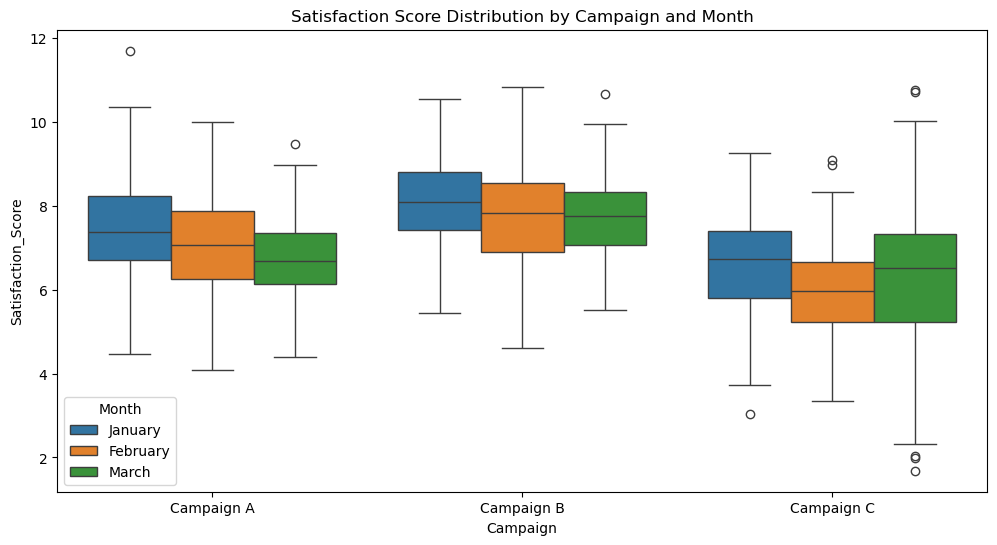

In [23]:
# Check for missing values
print(df.isnull().sum())

# Boxplot to visualize distribution of satisfaction scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Campaign', y='Satisfaction_Score', hue='Month')
plt.title('Satisfaction Score Distribution by Campaign and Month')
plt.show()

In [25]:
# Fit the Repeated Measures ANOVA model
model = AnovaRM(df, 'Satisfaction_Score', 'Customer_ID', within=['Campaign', 'Month']).fit()

# Run the ANOVA and print the results
anova_table = model.anova_table
print(anova_table)


                   F Value  Num DF  Den DF        Pr > F
Campaign        268.157704     2.0   398.0  1.772241e-74
Month            37.666412     2.0   398.0  1.043695e-15
Campaign:Month    4.043731     4.0   796.0  2.975403e-03
